In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
# !pip install Counter
from collections import Counter


plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.shape

(50000, 2)

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Lowercasing the df
df['review']=df['review'].str.lower()

In [5]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [6]:
df.isnull().mean()*100

review       0.0
sentiment    0.0
dtype: float64

In [7]:
df.duplicated().sum()

418

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(49582, 2)

In [10]:
# Removing the trailing spaces:
df['review']=df['review'].str.strip()
df['review'].apply(lambda x:x.startswith(' ') or x.endswith(' ')).sum()

0

In [11]:
# Removing html tags using regular expression:
tags=re.compile(r'<.*?>')
df['review']=df['review'].str.replace(tags,'',regex=True)

In [12]:
# Removing the \n:
trailing_spaces= df[df['review'].str.contains('\n', ' ', regex=True)]
trailing_spaces

,review,sentiment


In [13]:
label=LabelEncoder()

In [14]:
df['sentiment']=label.fit_transform(df['sentiment'])

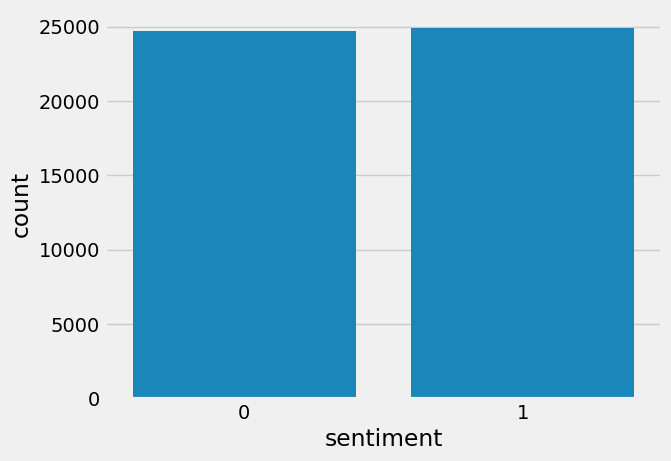

In [15]:
sns.countplot(data=df,x='sentiment')

plt.show()

In [16]:
df['word_count']=df['review'].apply(lambda x:len(x.split()))

In [17]:
df['word_count'].describe()

count    49582.000000
mean       227.302005
std        168.472856
min          4.000000
25%        125.000000
50%        171.000000
75%        276.000000
max       2450.000000
Name: word_count, dtype: float64

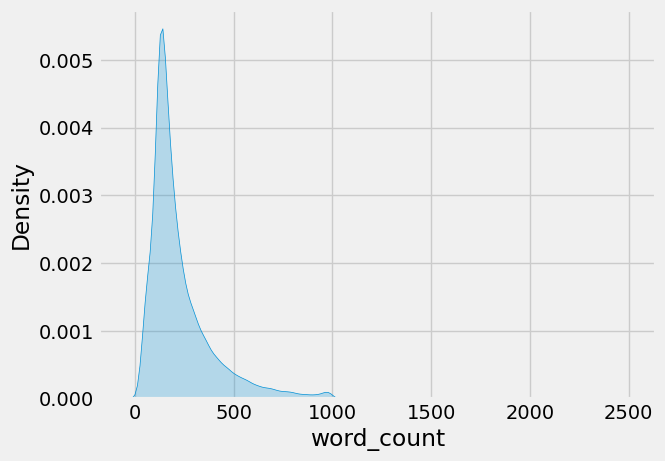

In [18]:
sns.kdeplot(data=df,x='word_count',fill=True)
plt.show()

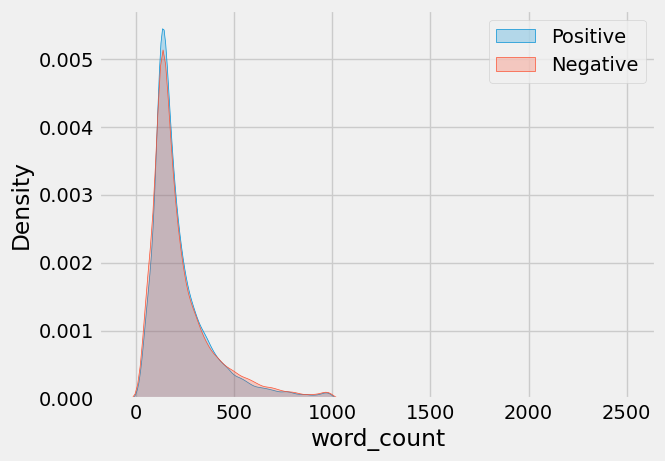

In [19]:
sns.kdeplot(df[df['sentiment']==0]['word_count'],fill=True,label="Positive")
sns.kdeplot(df[df['sentiment']==1]['word_count'],fill=True,label="Negative")

plt.legend()
plt.show()

We just found out the word count of each row which means how many words are there. Then we checked how the distribution differs between postitive and negative reviews. So, normally both of them have the same word count so the frequency of words may not be a useful feature to differtaite between the sentiments. 

In [20]:
# stop_words count:
stop_words=stopwords.words('english')

In [21]:
# Count the stopwords in each review:
df['stop_words']=df['review'].apply(lambda x:len([word for word in x.lower().split() if word in stop_words]))

In [22]:
df['stop_words'].describe()

count    49582.000000
mean       104.682082
std         77.491638
min          0.000000
25%         57.000000
50%         80.000000
75%        126.000000
max       1061.000000
Name: stop_words, dtype: float64

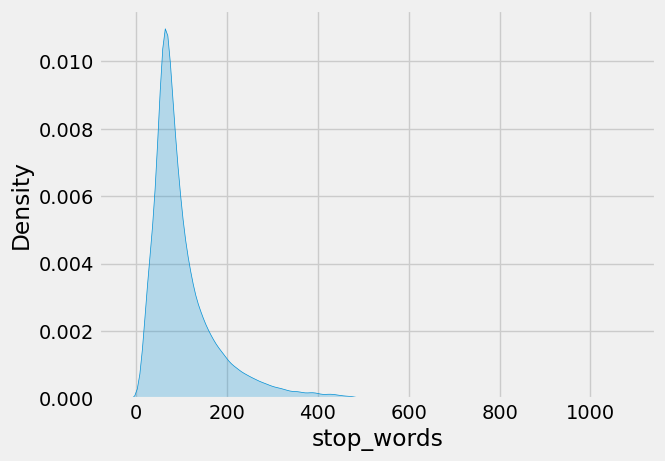

In [23]:
sns.kdeplot(data=df,x='stop_words',fill=True)
plt.show()

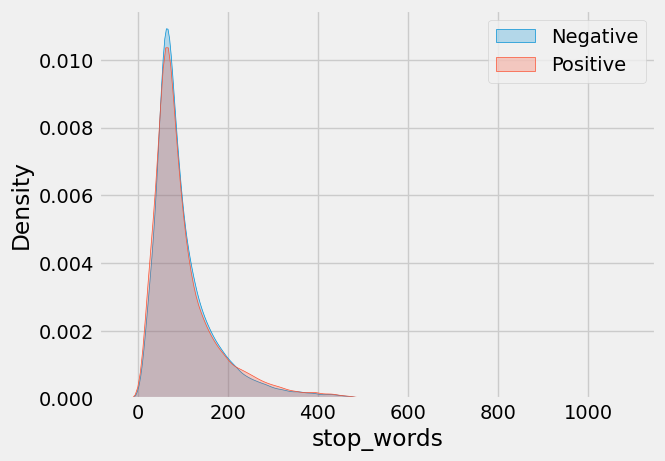

In [24]:
sns.kdeplot(data=df[df['sentiment']==0]['stop_words'],fill=True,label="Negative")
sns.kdeplot(data=df[df['sentiment']==1]['stop_words'],fill=True,label="Positive")

plt.legend()
plt.show()

In [25]:
# Find the 20 most common stop words:
stop_words=stopwords.words('english')
df_stop_words=[]
df['review'].apply(lambda x:[df_stop_words.append(word) for word in x.lower().split() if word in stop_words])

0        [None, None, None, None, None, None, None, Non...
1        [None, None, None, None, None, None, None, Non...
2        [None, None, None, None, None, None, None, Non...
3        [None, None, None, None, None, None, None, Non...
4        [None, None, None, None, None, None, None, Non...
                               ...                        
49995    [None, None, None, None, None, None, None, Non...
49996    [None, None, None, None, None, None, None, Non...
49997    [None, None, None, None, None, None, None, Non...
49998    [None, None, None, None, None, None, None, Non...
49999    [None, None, None, None, None, None, None, Non...
Name: review, Length: 49582, dtype: object

In [26]:
common_stop_words=Counter(df_stop_words).most_common(20)
common_stop_words

[('the', 635594),
 ('a', 314576),
 ('and', 311551),
 ('of', 284640),
 ('to', 262664),
 ('is', 203503),
 ('in', 178720),
 ('i', 141274),
 ('this', 137905),
 ('that', 129207),
 ('it', 128888),
 ('was', 92503),
 ('as', 87770),
 ('with', 83984),
 ('for', 83952),
 ('but', 77439),
 ('on', 62445),
 ('are', 56598),
 ('his', 56570),
 ('not', 56363)]

In [27]:
common_word_df=pd.DataFrame(common_stop_words,columns=['words','counts'])
common_word_df

,words,counts
0,the,635594
1,a,314576
2,and,311551
3,of,284640
4,to,262664
5,is,203503
6,in,178720
7,i,141274
8,this,137905
9,that,129207


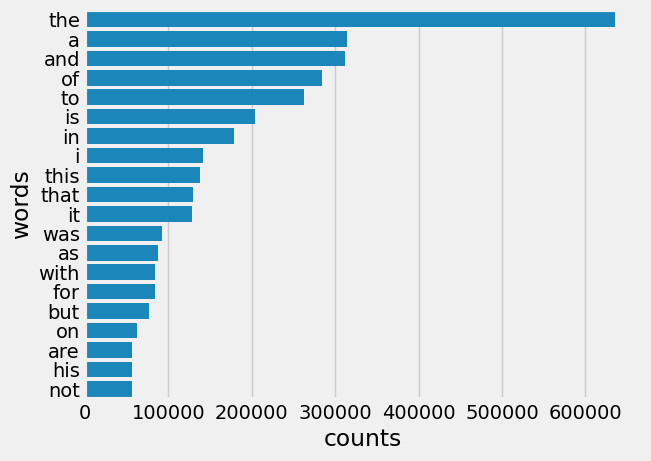

In [28]:
sns.barplot(data=common_word_df,y='words',x='counts')

plt.show()

Also, we wanted to look at some of the stop words and saw how they differ between the sentiments. Since they do not differ by much, it is safe to say both the sentiment reviews contains similar amount of stop words. Also, some of the most common stop words are the, a, and. We also have stopwords like not, but which change the direction of the sentences so while removing stopwords we should make sure we do not remove it. 

In [29]:
df['num_of_char']=df['review'].str.len()

In [30]:
df['num_of_char'].describe()

count    49582.000000
mean      1286.290569
std        972.171119
min         32.000000
25%        689.000000
50%        955.000000
75%       1560.000000
max      13584.000000
Name: num_of_char, dtype: float64

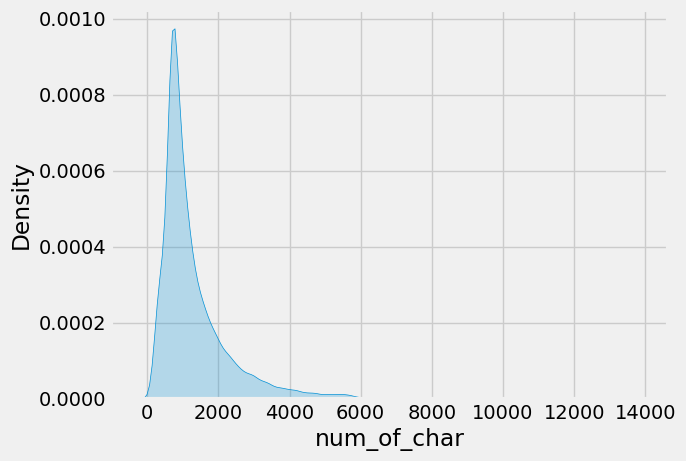

In [31]:
sns.kdeplot(data=df,x='num_of_char',fill=True)

plt.show()

In [32]:
common_char=[]
df['review'].apply(lambda x:[common_char.append(char) for char in x])

0        [None, None, None, None, None, None, None, Non...
1        [None, None, None, None, None, None, None, Non...
2        [None, None, None, None, None, None, None, Non...
3        [None, None, None, None, None, None, None, Non...
4        [None, None, None, None, None, None, None, Non...
                               ...                        
49995    [None, None, None, None, None, None, None, Non...
49996    [None, None, None, None, None, None, None, Non...
49997    [None, None, None, None, None, None, None, Non...
49998    [None, None, None, None, None, None, None, Non...
49999    [None, None, None, None, None, None, None, Non...
Name: review, Length: 49582, dtype: object

In [33]:
random_list=[]
for key,value in Counter(common_char).items():
    if value<50:
        random_list.append(key)

print(random_list)

['û', 'â', '\x84', 'ë', '¢', 'ø', 'å', 'ú', 'ì', 'æ', 'ê', '|', '\\', '§', 'î', '\xa0', 'õ', '‘', '…', '▼', 'ù', 'ð', '·', '½', 'ō', '\x95', '\x80', 'ý', 'ı', 'ğ', '₤', '\x10', '\x9a', 'ß', '®', '\x08', '¾', 'ż', '¡', '¿', 'º', '°', 'ò', '″', 'þ', '³', '\x8e', '\x9e', '¦', '\x8d', '\xad', '©', 'ª', '¤', 'י', 'ג', 'א', 'ל', 'כ', 'ר', 'מ', 'ו', 'ן', '★', '，', '、', '\uf0b7']


In [34]:
count_common_char=Counter(common_char).most_common(25)

In [35]:
common_char_df=pd.DataFrame(count_common_char,columns=['char','counts'])
common_char_df

,char,counts
0,,11220115
1,e,6052490
2,t,4749295
3,a,4078547
4,i,3889173
5,o,3780869
6,s,3435775
7,n,3348450
8,r,2839475
9,h,2760353


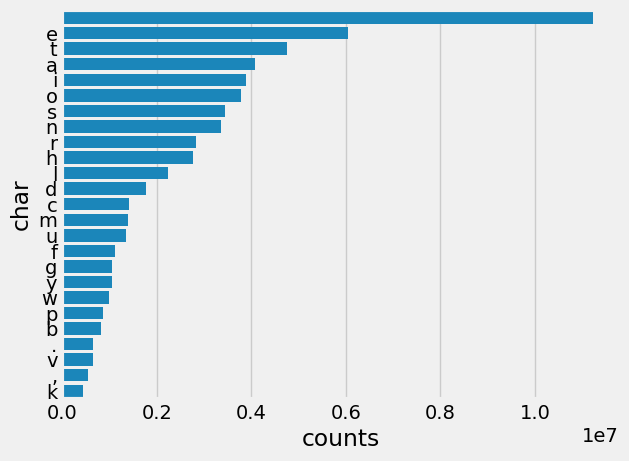

In [36]:
sns.barplot(data=common_char_df,x='counts',y='char')
plt.show()

Also, we looked into indivdual characters to see the most common one. Though they do not capture semantic meaning it is useful. For instance, we can see that there are characters which are not alphanumeric, so while text preprocessing I'll make sure to remove them. 